<a href="https://colab.research.google.com/github/AsutoshDalei/Deep-Neural-Networks/blob/master/SentimentAnalysisBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# !pip install kaggle --quiet
# ! mkdir ~/.kaggle
# ! chmod 600 ~/.kaggle/kaggle.json

# Sentiment Analysis using BERT

## Importing necessary packages

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy

from wordcloud import WordCloud
import torch

import warnings
warnings.filterwarnings('ignore')

In [4]:
%%time
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

import kagglehub

CPU times: user 329 ms, sys: 73.5 ms, total: 403 ms
Wall time: 465 ms


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [6]:
%%time
path = kagglehub.dataset_download("nelgiriyewithana/emotions")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/emotions/versions/1
CPU times: user 389 ms, sys: 19.6 ms, total: 408 ms
Wall time: 582 ms


In [7]:
os.listdir(path)

['text.csv']

In [8]:
%%time
data = pd.read_csv(path+'/text.csv',usecols=['text','label'])
data.head()

CPU times: user 732 ms, sys: 234 ms, total: 966 ms
Wall time: 973 ms


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [9]:
labelMap = {0:'sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}

In [10]:
%%time
fnx = lambda x:labelMap[x['label']]
data = data.assign(labelTone = data.apply(fnx,axis=1))
data.head()

CPU times: user 3.47 s, sys: 65 ms, total: 3.54 s
Wall time: 3.61 s


,text,label,labelTone
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       416809 non-null  object
 1   label      416809 non-null  int64 
 2   labelTone  416809 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.5+ MB


## Data Exploration

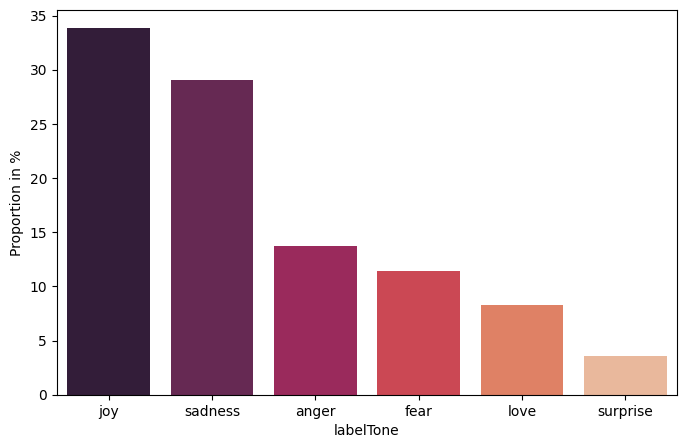

In [12]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(data['labelTone'].value_counts(normalize=True)*100, palette='rocket')
plt.ylabel("Proportion in %")
plt.show()

In [13]:
# " ".join(data['text'].values)

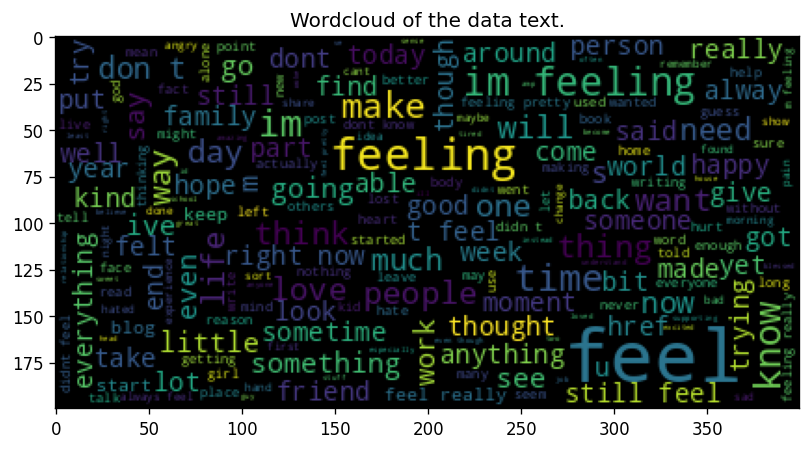

CPU times: user 626 ms, sys: 62.2 ms, total: 689 ms
Wall time: 1.26 s


In [20]:
%%time
wordcloud = WordCloud(background_color ='black', max_words=200, max_font_size=40, scale=1).generate(" ".join(data['text'].values))

plt.figure(figsize=(8,7),dpi=120)
plt.imshow(wordcloud)
plt.title("Wordcloud of the data text.")
plt.show()